# Final AI Tools Project
by Vinny and Jawadul

In [1]:
#Imports go here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Data Collection
The data that me and my partner are using is a dataset that shows different companies financial data and if they went bankrupt or not. This data came from kaggle and is mostly mostly numeric, with the status label being catagorical.

# Research Question
How well can a KNN accuratly predict if a company will go bankrupt using only the current assests and the net sales of the company.

# Hypothesis
I believe that a Knn with a K of 5 and a distance measurement of euclidean will achieve at least 90% accuracy when evaluating the overall accuracy.

# Data Preprocessing
Overall most of the data is numeric, and there are only 2 columns that are text based, and one that is catagorical data. The two text columns are the company name and year, and the catagorical feature is the status_label.

There are no null values, so there is no need no do anything to replace them. We will use a box plot on the dataframe to she the amount of outliers on either side, and to fix the outliers We will use the Z-score standardization approach.

We will also do One-Hot encoding on the status_label so that the KNN can read the status label

# Experiment Design
We will split the data for the KNN using the train test split method, which uses the holdout method of data splitting.
We will perform hyperparameter tuning by using a different range of k values and ploting them with their accuracies. We will do two graphs, one with euclidian distance, and one with cosine to decide the distance parameter. We will evaluate the accuracy of the model using the overall accuracy, since it is a good metric to judge the model, however The bigger class will have to be undersampled so that the class imbalance problem is fixed.

# Experiment begins here

In [2]:
#Load the data
df = pd.read_csv("american_bankruptcy.csv")
new_cols = {"X1":"Current_assets", 'X2': 'Cost_of_goods_sold', 'X3':'Depreciation_and_Amortization', 'X4': 'Financial_Performance', 'X5': 'Inventory', 'X6':'Net_Income','X7':'Total_Receivables','X8':'Market_Values','X9':'Net_Sales','X10':'Total_Assets','X11':'Total_longTerm_Debt','X12':'EBIT','X13':'Gross_profit','X14':'Current_Liabilities', 'X15':'Retained_Earnings','X16':'Total_Revenue','X17':'Total_Liabilities','X18':'Operation_Costs'}
df.rename(columns = new_cols, inplace=True)
df.head()

,company_name,status_label,year,Current_assets,Cost_of_goods_sold,Depreciation_and_Amortization,Financial_Performance,Inventory,Net_Income,Total_Receivables,...,Net_Sales,Total_Assets,Total_longTerm_Debt,EBIT,Gross_profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operation_Costs
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [3]:
#Check for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current_assets                 78682 non-null  float64
 4   Cost_of_goods_sold             78682 non-null  float64
 5   Depreciation_and_Amortization  78682 non-null  float64
 6   Financial_Performance          78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net_Income                     78682 non-null  float64
 9   Total_Receivables              78682 non-null  float64
 10  Market_Values                  78682 non-null  float64
 11  Net_Sales                      78682 non-null  float64
 12  Total_Assets                   78682 non-null 

<Axes: >

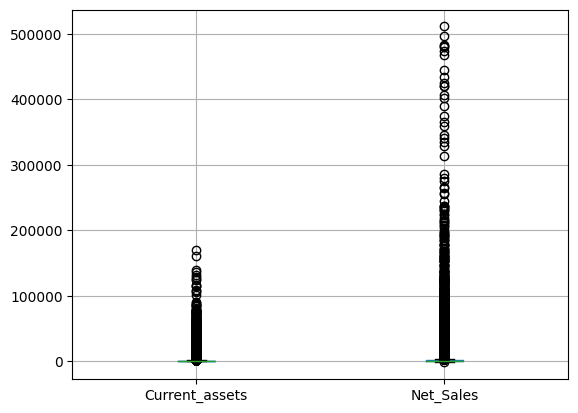

In [4]:
# check for outliers in the selected data for experimentation
num_df = df[['Current_assets','Net_Sales']]
num_df.head()
num_df.boxplot()

In [5]:
#Standardize the data
num_df = num_df.apply(zscore)
num_df.head()

,Current_assets,Net_Sales
0,-0.093952,-0.112108
1,-0.100421,-0.124667
2,-0.112944,-0.144377
3,-0.123188,-0.147087
4,-0.114078,-0.143269


In [6]:
#Grab the labels and do one-hot-encoding
labels = df['status_label'].apply(lambda x: 1 if x == 'alive' else (0 if x =='failed' else x))
labels.value_counts()

status_label
1    73462
0     5220
Name: count, dtype: int64

In [7]:
num_df['labels'] = labels
num_df.head()

,Current_assets,Net_Sales,labels
0,-0.093952,-0.112108,1
1,-0.100421,-0.124667,1
2,-0.112944,-0.144377,1
3,-0.123188,-0.147087,1
4,-0.114078,-0.143269,1


In [8]:
# grab training data with the alive label
alive_df = num_df[num_df['labels'] == 1]
print(alive_df.head())
failed_df = num_df[num_df['labels'] == 0]
failed_df.head()

   Current_assets  Net_Sales  labels
0       -0.093952  -0.112108       1
1       -0.100421  -0.124667       1
2       -0.112944  -0.144377       1
3       -0.123188  -0.147087       1
4       -0.114078  -0.143269       1


,Current_assets,Net_Sales,labels
50,0.902024,1.285857,0
51,1.094207,1.450962,0
52,1.440647,1.389037,0
53,1.032607,1.249790,0
54,0.967697,1.261589,0


In [9]:
print(alive_df.size)
print(failed_df.size)

220386
15660


In [10]:
alive_labels_df = num_df.sample(n = failed_df.size)
alive_labels_df.head()
final_df = pd.concat([alive_labels_df, failed_df], ignore_index = True)
final_df.head()

,Current_assets,Net_Sales,labels
0,-0.152380,-0.084571,1
1,-0.220373,-0.196585,1
2,-0.169399,-0.172739,1
3,-0.222679,-0.196654,1
4,-0.216976,-0.193512,1


In [11]:
# Split the labels from the final df and get the training and testing datasets
labels = final_df['labels']
final_df.head()
final_df.drop(columns = ['labels'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(final_df, labels, random_state = 42)

In [21]:
#Run the model and do hyper parameter tuning.
def run_knn_metrics(X_train, y_train, X_test, y_test, k=5, dm = 'euclidean'):
    knn = KNeighborsClassifier(n_neighbors=k, metric = dm)
    knn.fit(X_train, y_train)
    training_acc = knn.score(X_train, y_train)
    testing_acc = knn.score(X_test, y_test)
    pred = knn.predict(X_test)
    print(confusion_matrix(y_test, pred))
    return training_acc, testing_acc

In [19]:
k_values = range(1, 50, 1)
training_accuracy_euclid = []
testing_accuracy_euclid = []

training_accuracy_cosine = []
testing_accuracy_cosine = []

for i in range(len(k_values)):
    accs = run_knn_metrics(X_train, y_train, X_test, y_test, k = k_values[i], dm = 'euclidean')
    training_accuracy_euclid.append(accs[0])
    testing_accuracy_euclid.append(accs[1])
    
for i in range(len(k_values)):
    accs = run_knn_metrics(X_train, y_train, X_test, y_test, k = k_values[i], dm = 'cosine')
    training_accuracy_cosine.append(accs[0])
    testing_accuracy_cosine.append(accs[1])

[[ 750  716]
 [ 817 1632]]
[[1004  462]
 [1306 1143]]
[[ 639  827]
 [ 752 1697]]
[[ 836  630]
 [1065 1384]]
[[ 578  888]
 [ 668 1781]]
[[ 767  699]
 [ 925 1524]]
[[ 550  916]
 [ 624 1825]]
[[ 688  778]
 [ 836 1613]]
[[ 521  945]
 [ 601 1848]]
[[ 647  819]
 [ 774 1675]]
[[ 517  949]
 [ 579 1870]]
[[ 619  847]
 [ 745 1704]]
[[ 482  984]
 [ 534 1915]]
[[ 577  889]
 [ 671 1778]]
[[ 474  992]
 [ 521 1928]]
[[ 555  911]
 [ 652 1797]]
[[ 460 1006]
 [ 502 1947]]
[[ 538  928]
 [ 608 1841]]
[[ 448 1018]
 [ 472 1977]]
[[ 523  943]
 [ 566 1883]]
[[ 441 1025]
 [ 455 1994]]
[[ 509  957]
 [ 543 1906]]
[[ 435 1031]
 [ 413 2036]]
[[ 491  975]
 [ 493 1956]]
[[ 419 1047]
 [ 396 2053]]
[[ 464 1002]
 [ 469 1980]]
[[ 405 1061]
 [ 374 2075]]
[[ 460 1006]
 [ 450 1999]]
[[ 397 1069]
 [ 374 2075]]
[[ 466 1000]
 [ 434 2015]]
[[ 405 1061]
 [ 364 2085]]
[[ 446 1020]
 [ 428 2021]]
[[ 393 1073]
 [ 350 2099]]
[[ 442 1024]
 [ 407 2042]]
[[ 386 1080]
 [ 342 2107]]
[[ 437 1029]
 [ 394 2055]]
[[ 385 1081]
 [ 348 2101]]
[

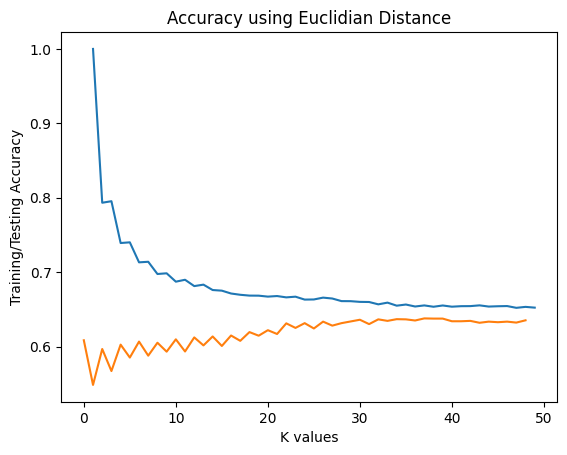

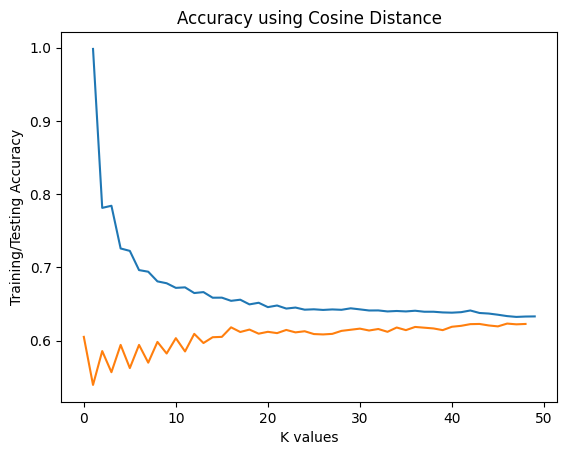

In [20]:
plt.plot(k_values, training_accuracy_euclid, testing_accuracy_euclid)
plt.xlabel('K values')
plt.ylabel('Training/Testing Accuracy')
plt.title('Accuracy using Euclidian Distance')
plt.show()

plt.plot(k_values, training_accuracy_cosine, testing_accuracy_cosine)
plt.xlabel('K values')
plt.ylabel('Training/Testing Accuracy')
plt.title('Accuracy using Cosine Distance')
plt.show()

In [28]:
#final run with Chosen Parameters
accs = run_knn_metrics(X_train, y_train, X_test, y_test, k = 45, dm = 'euclidean')
print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(accs[0]))
print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(accs[1]))

[[ 375 1091]
 [ 344 2105]]
Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.63


# Why We chose these parameters
We chose these parameters as they were the best in terms of distance between the training and testing accuracy. However the accuracy values themselves are not very good.

# Conclusions
It would seem that a KNN is not a good machine learning algorithm for predicting bankruptcy. The algorithm could not reach above a 70 on the training data. SOme potential limitations are that there are many reasons behind why a company goes bankrupt, A potential change would be to use more of the features from the dataset instead of just two from the dataset. It may also be good to use a different type of accuracy such as sensitivity as even with undersampling, the overall accuracy is still not very good.